In [2]:
from pathlib import Path
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import datetime, sys, sklearn

ROOT_DIR = Path(__file__).resolve().parents[1] if "__file__" in locals() else Path.cwd().parents[0]
DATA_DIR = ROOT_DIR / "data" / "scaled"
OUT_DIR = ROOT_DIR / "data" / "balanced"
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
train = pd.read_csv(DATA_DIR / "train_scaled.csv")
val = pd.read_csv(DATA_DIR / "val_scaled.csv")
test = pd.read_csv(DATA_DIR / "test_scaled.csv")

X_train = train.drop(columns=["Churn"])
y_train = train["Churn"]

X_val = val.drop(columns=["Churn"])
y_val = val["Churn"]

X_test = test.drop(columns=["Churn"])
y_test = test["Churn"]

In [4]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 3621, 1: 1308})
After SMOTE: Counter({0: 3621, 1: 3621})


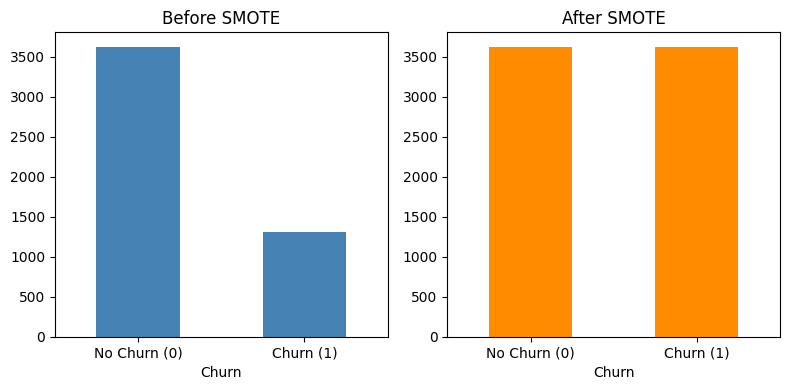

In [5]:
counts_before = pd.Series(y_train).value_counts().sort_index()
counts_after = pd.Series(y_train_res).value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
counts_before.plot(kind="bar", ax=ax[0], color="steelblue", title="Before SMOTE")
counts_after.plot(kind="bar", ax=ax[1], color="darkorange", title="After SMOTE")
for a in ax:
    a.set_xticklabels(["No Churn (0)", "Churn (1)"], rotation=0)
plt.tight_layout()
plt.show()

In [6]:
train_res = pd.concat([X_train_res, y_train_res], axis=1)
train_res.to_csv(OUT_DIR / "train_balanced.csv", index=False)
val.to_csv(OUT_DIR / "val_balanced.csv", index=False)
test.to_csv(OUT_DIR / "test_balanced.csv", index=False)

In [7]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

before_0, before_1 = counts_before[0], counts_before[1]
after_0, after_1 = counts_after[0], counts_after[1]

md = f"""# SMOTE Balancing Report

**Datum/Zeit:** {now}  
**random_state:** 42  

---

## Overview
- Applied **SMOTE (Synthetic Minority Over-sampling Technique)** on the training set only  
- Balances class distribution for `Churn` (0 = No, 1 = Yes)  
- Validation and Test sets remain untouched  

---

## Class Distribution

| Split | Class 0 (No Churn) | Class 1 (Churn) |
|--------|-------------------:|----------------:|
| Before SMOTE | {before_0} | {before_1} |
| After SMOTE (train only) | {after_0} | {after_1} |

---

## Visualization
*(See corresponding notebook cell for the bar chart of class distribution before and after SMOTE.)*

---

## Output
- `data/balanced/train_balanced.csv`  
- `data/balanced/val_balanced.csv`  
- `data/balanced/test_balanced.csv`  

---

## Reproducibility
- Python {sys.version.split()[0]}  
- pandas {pd.__version__}  
- scikit-learn {sklearn.__version__}

---

## 🧠 Note
Balancing the training set mitigates bias toward the majority class and helps the model learn minority-class patterns effectively.  
SMOTE synthesizes new samples by interpolating existing minority instances, ensuring a smoother class boundary.
"""

REPORT_DIR = ROOT_DIR / "reports" / "data_preparation"
REPORT_DIR.mkdir(parents=True, exist_ok=True)
Path(REPORT_DIR / "smote_report.md").write_text(md, encoding="utf-8")

1102